In [1]:
%matplotlib inline

import sys
import os
import sklearn
import numpy as np
import scipy as sp
import scipy.sparse as spa
import matplotlib.pyplot as plt
from time import time
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans


In [2]:
# Load the training set
print("Loading 20 newsgroups training set... ")
dataset = fetch_20newsgroups(subset='all',shuffle=True, random_state=4)
#Classifying dataset into training set
t0=time()
newsgroups_train = fetch_20newsgroups(subset='train')
#print(newsgroups_train.DESCR)
print("%d documents" % len(newsgroups_train.filenames))
#filenames = newsgroups_train.filenames
print("%d categories" % len(newsgroups_train.target_names))
print("done in %fs" % (time() - t0))

Loading 20 newsgroups training set... 
11314 documents
20 categories
done in 0.285633s


In [3]:
print("Loading 20 newsgroups test set... ")
#Classifying daatset into test set
newsgroups_test = fetch_20newsgroups(subset='test')
t0 = time()
print("done in %fs" % (time() - t0))
print("Predicting the labels of the test set...")
print("%d documents" % len(newsgroups_test.filenames))
print("%d categories" % len(newsgroups_test.target_names))



Loading 20 newsgroups test set... 
done in 0.000000s
Predicting the labels of the test set...
7532 documents
20 categories


In [4]:
# Feature Extraction
#We now vectorize the dataset using SKLearn vectorizers.
#This is the stage of feature extraction. We use the TF-IDF feature model.
t0=time()
vectorizer = TfidfVectorizer(encoding='latin1')
X_train = vectorizer.fit_transform(newsgroups_train.filenames)
print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X_train.shape)
assert spa.issparse(X_train)
y_train = newsgroups_train.target


done in 0.221436s
n_samples: 11314, n_features: 9879


In [6]:
print("Extracting features from the dataset using the same vectorizer")
t0 = time()
X_test = vectorizer.transform( newsgroups_test.filenames)
y_test = newsgroups_test.target
print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X_test.shape)

Extracting features from the dataset using the same vectorizer
done in 0.157541s
n_samples: 7532, n_features: 9879


In [5]:
#Benchmarking aims at evaluating something by comparison with a standard. 
#Benchmarking the code means how fast the code is executing and where the bottleneck is.
#One major reason for benchmarking is that it optimizes the code.

#A confusion matrix is a tabular summary of the number of correct and incorrect predictions made by a classifier.
#It can be used to evaluate the performance of a classification model through the calculation of performance metrics like accuracy, precision, recall, and F1-score.

In [6]:
#benchmark  Multinomialclassifiers
 
    
def benchmark(clf_class, params, name):
    print("parameters:", params)
    t0 = time()
    clf = clf_class(**params).fit(X_train, y_train)
    print("done in %fs" % (time() - t0))

    if hasattr(clf, 'coef_'):
        print("Percentage of non zeros coef: %f" % (np.mean(clf.coef_ != 0) * 100))
    print("Predicting the outcomes of the testing set")
    t0 = time()
    pred = clf.predict(X_test)
    print("done in %fs" % (time() - t0))

    print("Classification report on test set for classifier:")
    print(clf)
    print()
    print(classification_report(y_test, pred, target_names=newsgroups_test.target_names))

    cm = confusion_matrix(y_test, pred)
    print("Confusion matrix:")
    print(cm)
    
    # Show confusion matrix
    plt.matshow(cm)
    plt.colorbar(orientation = 'horizontal' )
    plt.title('Confusion matrix')
    
    
    

Testbenching a MultinomialNB classifier...
parameters: {'alpha': 0.01}
done in 0.021942s
Percentage of non zeros coef: 100.000000
Predicting the outcomes of the testing set
done in 0.003990s
Classification report on test set for classifier:
MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

                          precision    recall  f1-score   support

             alt.atheism       1.00      1.00      1.00       319
           comp.graphics       1.00      1.00      1.00       389
 comp.os.ms-windows.misc       1.00      1.00      1.00       394
comp.sys.ibm.pc.hardware       1.00      1.00      1.00       392
   comp.sys.mac.hardware       1.00      1.00      1.00       385
          comp.windows.x       1.00      1.00      1.00       395
            misc.forsale       1.00      1.00      1.00       390
               rec.autos       1.00      0.79      0.88       396
         rec.motorcycles       0.80      0.83      0.81       398
      rec.sport.baseball       0.86  

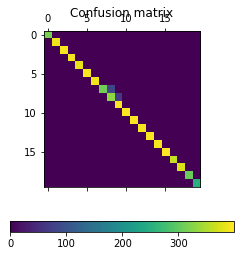

In [9]:
#Benchmark Multinomial Classifier
print("Testbenching a MultinomialNB classifier...")
parameters = {'alpha': 0.01}

benchmark(MultinomialNB, parameters, 'MultinomialNB')

In [7]:
#removing the noisy data

vectorizer = TfidfVectorizer(min_df=10, max_df=0.5,stop_words='english')
vectorized = vectorizer.fit_transform(dataset.data)
num_samples, num_features = vectorized.shape
num_clusters = 20


#creating clusters

km = KMeans(n_clusters=num_clusters, init='random',max_iter=30, n_init=1, verbose=0 )
km.fit(vectorized)
labels = np.array(km.labels_)

#printing clusters
for i in range(0,num_clusters):
    num_docs_in_cluster = sum((labels == i))
    print ("cluster ",i,": ", "number of documents ",num_docs_in_cluster)
    


cluster  0 :  number of documents  3801
cluster  1 :  number of documents  128
cluster  2 :  number of documents  648
cluster  3 :  number of documents  133
cluster  4 :  number of documents  538
cluster  5 :  number of documents  123
cluster  6 :  number of documents  4958
cluster  7 :  number of documents  2800
cluster  8 :  number of documents  621
cluster  9 :  number of documents  402
cluster  10 :  number of documents  249
cluster  11 :  number of documents  550
cluster  12 :  number of documents  555
cluster  13 :  number of documents  241
cluster  14 :  number of documents  885
cluster  15 :  number of documents  390
cluster  16 :  number of documents  1176
cluster  17 :  number of documents  184
cluster  18 :  number of documents  270
cluster  19 :  number of documents  194


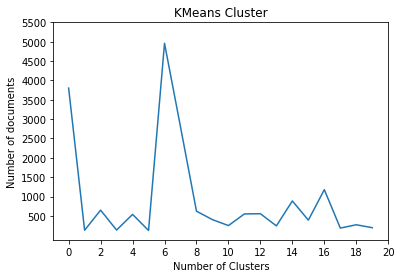

In [8]:
arr_1 = [0 for x in range(20)]
for x in range (0, 20):
     arr_1[x]=x

arr_2=[0 for y in range(20)]
for y in range(0,num_clusters):
    num_docs_in_cluster = sum((labels == y))
    arr_2[y]=num_docs_in_cluster

#Line Plot
plt.plot(arr_1,arr_2)
plt.xlabel('Number of Clusters')
plt.ylabel ('Number of documents')
plt.title('KMeans Cluster')
plt.xticks((0,2,4,6,8,10,12,14,16,18,20))
plt.yticks((500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500))
plt.show()

In [9]:
# Input post
new_post=input("Enter new_post: ")
t0 = time()



Enter new_post: Disk drive problems. Hi, I have a problem with my hard disk.  After 1 year it is working only sporadically now. I tried to format it, but now it doesn't boot any more. Any ideas? Thanks.


In [29]:
#finding similar posts
if new_post.isdigit():
    print("Invalid post")
else:
    # vectorizing input post
    new_post_vec = vectorizer.transform([new_post])
    new_post_label = km.predict(new_post_vec)[0]
    #Fetching indices in the original dataset
    similar_indices = (labels==new_post_label).nonzero()[0]
    #Finding similar posts
    similar = []
    for i in similar_indices:
        dist = sp.linalg.norm((new_post_vec-vectorized[i,:]).toarray())
        similar.append((dist, dataset.data[i]))
    similar = sorted(similar)
    
#print(similar)
    
print("Number of similar posts: ", len(similar))
print("done in %fs" % (time() - t0))


Number of similar posts:  1176
done in 3391.058196s


In [28]:
# Number of documents in a cluster
docs = [0 for i in range(20)]
for i in range(0,num_clusters):
    num_docs_in_cluster = sum((labels == i))
    docs[i]= num_docs_in_cluster

temp = np.append(np.cumsum(docs[:-1]),docs[-1])
temp[19]= temp[18]+temp[19]

#finding similar posts in each cluster 
x = 0
similar_posts_in_each_cluster = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(0,20):
    for j in range(0, len(similar_indices)):
            if(similar_indices[j] < temp[i]):
                   x = x+1
    
            similar_posts_in_each_cluster[i] = x
            
    x = 0
similar_posts_in_each_cluster

[245,
 253,
 292,
 296,
 329,
 340,
 649,
 818,
 857,
 882,
 901,
 942,
 973,
 989,
 1044,
 1065,
 1139,
 1150,
 1167,
 1176]

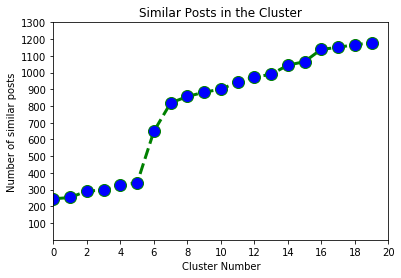

In [27]:
#Line plot
plt.plot(arr_1, similar_posts_in_each_cluster,color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
plt.xlim(0,20) 
plt.ylim(0,1300) 
plt.xlabel('Cluster Number')
plt.ylabel ('Number of similar posts')
plt.title('Similar Posts in the Cluster')
plt.xticks((0,2,4,6,8,10,12,14,16,18,20))
plt.yticks((100,200,300,400,500,600,700,800,900,1000,1100,1200,1300))
plt.show()

In [20]:
show_at_1 = similar[0]
show_at_2 = similar[int(len(similar)/2)]
show_at_3 = similar[-1]

from tabulate import tabulate
table = [show_at_1, show_at_2, show_at_3]
print(tabulate(table,headers=["Index","Position","Excerpt Posts"], showindex=True, tablefmt="grid"))


+---------+------------+---------------------------------------------------------------------------------+
|   Index |   Position | Excerpt Posts                                                                   |
+=========+============+=================================================================================+
|       0 |    1.08548 | From: rogntorb@idt.unit.no (Torbj|rn Rognes)                                    |
|         |            | Subject: Adding int. hard disk drive to IIcx                                    |
|         |            | Keywords: Mac IIcx, internal, hard disk drive, SCSI                             |
|         |            | Reply-To: rogntorb@idt.unit.no (Torbj|rn Rognes)                                |
|         |            | Organization: Div. of CS & Telematics, Norwegian Institute of Technology        |
|         |            | Lines: 32                                                                       |
|         |            |             